In [1]:
import pandas as pd
import numpy as np
train=pd.read_csv("train.csv")
train.head(3)

id  X00    X01  X02  X03  X04     X05  ...  Y12   Y13  Y14  Y15  Y16  Y17  Y18
0   0  9.7  988.8  1.2  0.6  0.0  1009.3  ...  9.0  10.0  9.5  9.0  8.0  9.0  NaN
1   1  9.3  988.9  1.7  1.9  0.0  1009.3  ...  8.5  10.0  9.5  9.0  7.5  9.0  NaN
2   2  9.4  989.0  1.1  2.3  0.0  1009.2  ...  8.0   9.5  9.5  8.5  7.5  8.5  NaN

[3 rows x 60 columns]

In [0]:
test=pd.read_csv("test.csv")

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 60 columns):
id     4752 non-null int64
X00    4752 non-null float64
X01    4752 non-null float64
X02    4752 non-null float64
X03    4752 non-null float64
X04    4752 non-null float64
X05    4752 non-null float64
X06    4752 non-null float64
X07    4752 non-null float64
X08    4752 non-null float64
X09    4752 non-null float64
X10    4752 non-null float64
X11    4752 non-null float64
X12    4752 non-null float64
X13    4752 non-null float64
X14    4752 non-null float64
X15    4752 non-null float64
X16    4752 non-null float64
X17    4752 non-null float64
X18    4752 non-null float64
X19    4752 non-null float64
X20    4752 non-null float64
X21    4752 non-null float64
X22    4752 non-null float64
X23    4752 non-null float64
X24    4752 non-null float64
X25    4752 non-null float64
X26    4752 non-null float64
X27    4752 non-null float64
X28    4752 non-null float64
X29    4752 non-null floa

In [0]:
#같은 feauture?
f_temp=train[['X00','X07','X28','X31','X32']] #기온
f_atmos=train[['X01','X06','X22','X27','X29']] #현지기압
f_wind=train[['X02','X03','X18','X24','X26']] #풍속
f_rain=train[['X04','X10','X21','X36','X39']] #일일누적강수량
f_sea=train[['X05','X08','X09','X23','X33']] #해면기압
f_solar=train[['X11','X14','X16','X19','X34']] #일일누적일사량
f_hum=train[['X12','X20','X30','X37','X38']] #습도
f_dir=train[['X13','X15','X17','X25','X35']] #풍향

In [4]:
f_temp.head()

X00   X07   X28  X31   X32
0  9.7  12.2  12.3  8.2  10.7
1  9.3  12.1  12.1  8.3  10.3
2  9.4  12.1  12.1  8.0   9.7
3  9.4  12.0  12.1  7.7   9.4
4  9.2  12.0  12.0  7.4   9.4

In [0]:
#누적값 처리
f_solar_each=f_solar.diff().clip(lower=0)
f_rain_each=f_rain.diff().clip(lower=0)

In [6]:
f_solar_each.head()

X11  X14  X16  X19  X34
0  NaN  NaN  NaN  NaN  NaN
1  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0

In [7]:
f_rain_each.head()

X04  X10  X21  X36  X39
0  NaN  NaN  NaN  NaN  NaN
1  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0

In [0]:
#nan값 처리 
f_solar_each[np.isnan(f_solar_each)] = 0
f_rain_each[np.isnan(f_rain_each)] = 0

In [9]:
f_solar_each.head()

X11  X14  X16  X19  X34
0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0

In [10]:
f_rain_each.head()

X04  X10  X21  X36  X39
0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0

In [12]:
# 동일한 feature에 해당하는 col은 평균으로 처리 
train['temp'] = (train['X00']+train['X07']+train['X28']+train['X31']+train['X32'])/5  #기온
train['atmos'] = (train['X01']+train['X06']+train['X22']+train['X27']+train['X29'])/5 #현지기압
train['wind'] = (train['X02']+train['X03']+train['X18']+train['X24']+train['X26'])/5  #풍속
train['rain'] = (f_rain_each['X04']+f_rain_each['X10']+f_rain_each['X21']+f_rain_each['X36']+f_rain_each['X39'])/5  #일일누적강수량
train['sea'] = (train['X05']+train['X08']+train['X09']+train['X23']+train['X33'])/5   #해면기압
train['solar'] = (f_solar_each['X11']+f_solar_each['X14']+f_solar_each['X16']+f_solar_each['X19']+f_solar_each['X34'])/5 #일일누적일사량
train['hum'] = (train['X12']+train['X20']+train['X30']+train['X37']+train['X38'])/5   #습도
train['dir'] = (train['X13']+train['X15']+train['X17']+train['X25']+train['X35'])/5   #풍향
train.head(3) #8개

id  X00    X01  X02  X03  X04  ...  wind  rain      sea  solar    hum     dir
0   0  9.7  988.8  1.2  0.6  0.0  ...  0.74   0.0  1009.78    0.0  76.46   97.44
1   1  9.3  988.9  1.7  1.9  0.0  ...  0.80   0.0  1009.84    0.0  76.84  100.50
2   2  9.4  989.0  1.1  2.3  0.0  ...  0.80   0.0  1009.84    0.0  78.42  122.24

[3 rows x 68 columns]

In [0]:
#전체 train 가져가는 경우 
train_all=pd.concat([f_solar_each,f_rain_each,f_temp, f_atmos, f_wind, f_sea, f_hum, f_dir],axis=1)

In [14]:
train_all.head(10) #40개 

X11  X14  X16  X19  X34  X04  ...   X38    X13    X15    X17  X25    X35
0  0.0  0.0  0.0  0.0  0.0  0.0  ...  62.6   71.3  101.1   56.1  2.3  256.4
1  0.0  0.0  0.0  0.0  0.0  0.0  ...  63.5  121.8  165.3    0.0  0.0  215.4
2  0.0  0.0  0.0  0.0  0.0  0.0  ...  63.9  232.0  144.0    0.0  0.0  235.2
3  0.0  0.0  0.0  0.0  0.0  0.0  ...  64.5    0.0  115.9  294.1  0.0  214.0
4  0.0  0.0  0.0  0.0  0.0  0.0  ...  65.0    0.0  124.7    0.0  0.0  174.9
5  0.0  0.0  0.0  0.0  0.0  0.0  ...  65.1  222.0  174.2    0.0  0.0  243.1
6  0.0  0.0  0.0  0.0  0.0  0.0  ...  65.5  257.8  168.9    0.0  0.0  195.8
7  0.0  0.0  0.0  0.0  0.0  0.0  ...  65.7  226.4  112.8    0.0  0.0  262.7
8  0.0  0.0  0.0  0.0  0.0  0.0  ...  66.5  215.0  157.4    0.0  0.0  236.1
9  0.0  0.0  0.0  0.0  0.0  0.0  ...  67.6  214.4  134.0    0.0  0.0  230.9

[10 rows x 40 columns]

In [0]:
#30일 데이터로 먼저 학습 
X_train = train_all[:4320]
y_train = train[['Y00','Y01','Y02','Y03','Y04','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17']][:4320]

In [16]:
y_train.head()

Y00   Y01   Y02   Y03   Y04   Y05   Y06  ...  Y11  Y12   Y13  Y14  Y15  Y16  Y17
0  12.5  11.5  11.0  20.0  20.0  10.5  10.0  ...  7.0  9.0  10.0  9.5  9.0  8.0  9.0
1  12.5  11.0  11.0  20.0  20.0  10.0   9.5  ...  7.0  8.5  10.0  9.5  9.0  7.5  9.0
2  12.0  11.0  11.0  19.5  19.5  10.0   9.0  ...  6.5  8.0   9.5  9.5  8.5  7.5  8.5
3  12.0  11.0  11.0  19.5  19.5   9.5   9.0  ...  6.0  8.0   9.5  9.0  8.5  7.5  8.5
4  12.0  10.5  10.5  19.0  19.5   9.5   8.5  ...  6.0  7.5   9.5  9.0  8.5  7.5  8.5

[5 rows x 18 columns]

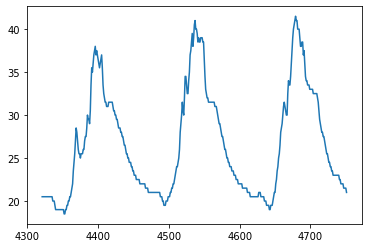

In [17]:
#target
import matplotlib.pyplot as plt
plt.plot(train['Y18'][4321:])
plt.show()

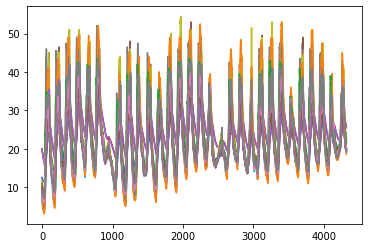

In [18]:
plt.plot(y_train)
plt.show()

In [0]:
import pandas as pd
import numpy as np
%tensorflow_version 1.x
import tensorflow
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU
import matplotlib.pyplot as plt

In [0]:
X_train = X_train.values #30일데이터
y_train = y_train.values

In [0]:
#normalize
sc = MinMaxScaler(feature_range=(0,1))
X_train=sc.fit_transform(X_train)
y_test=sc.fit_transform(y_test)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [26]:
X_train.shape

(3888, 40)

In [27]:
y_train #확인

array([[28.5, 36.5, 37.5, ..., 36.5, 39. , 42.5],
       [21.5, 24.5, 24.5, ..., 26.5, 29. , 29. ],
       [11.5,  9. ,  9. , ...,  8. ,  6.5,  8. ],
       ...,
       [18. , 18. , 17.5, ..., 17. , 17. , 17. ],
       [26.5, 33. , 32.5, ..., 28. , 35. , 35.5],
       [26. , 33.5, 32.5, ..., 28.5, 35.5, 34.5]])

In [29]:
#초기화 
keras.initializers.he_normal(seed=None) #randomnormal
clf = Sequential([
    Dense(15, kernel_initializer='uniform', input_dim=40, activation='elu'),
    Dense(20, kernel_initializer='uniform', activation='relu'),
    Dropout(0.25),
    Dense(25, kernel_initializer='uniform', activation='elu'),
    Dense(18, kernel_initializer='uniform', activation='elu'),
])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#original : [samples, features] 
#LSTM data shape : [samples, time steps, features]
X_train_reshape = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshape = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [0]:
model = Sequential()
model.add(GRU(4, input_shape=(1, X_train_reshape.shape[2])))
model.add(Dropout(0.3))
model.add(Dense(18))

In [32]:
#학습
clf.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [33]:
score = clf.evaluate(X_test, y_test, verbose=0)
print(clf.metrics_names[0])
print(score[0]) #mse







loss
0.25408842938917653
